In [36]:
# 2軸へ角速度指令
import numpy as np
import pyautogui
import sys, time
import pandas as pd
import matplotlib.pyplot as plt
from dx2lib import *  # dx2libをインポート

COMPort = b'\\\\.\\COM4'  # 任意のCOMポート名に修正の事
Baudrate = 57600          # Dynamixelのボーレートと合わせる事
TargetID1 = 1             # 1台目のDynamixelのIDと合わせる事
#TargetID2 = 2             # 2台目のDynamixelのIDと合わせる事

#---------------------------------------------
# (1) ポートを開いてdevを取得(必須)
dev = DX2_OpenPort(COMPort, Baudrate)
if dev != None:
  # (2) IDの一覧
  IDs = (c_uint8 * 2)(TargetID1)
  #IDs = (c_uint8 * 2)(TargetID1, TargetID2)
  # (3) 指定IDのモデル情報を取得しモデル名を表示
  #   いちいちモデル名を表示する必要は無いが、情報取得のついでに表示
  #   また、ここでは情報の取得ができたかの確認をしていない
  for id in IDs:
    print(id, DXL_GetModelInfo(dev,id).contents.name.decode())

  # (4) DynamixelをVelocityモード=1に変更
  DXL_SetOperatingModesEquival(dev, IDs, 2, 4)
  # (5) トルクイネーブル(必須)
  DXL_SetTorqueEnablesEquival(dev, IDs, 2, True)

  # (6) 2軸分の角速度[deg/sec]と時間待ちを順次指令
  StartAngle = 0
  EndAngle = 100
  Resolution = 10
  DXL_SetGoalAngle(dev, TargetID1, StartAngle)
  time.sleep(2)
  i = 0
  RepeatNum = 2
  dataX = []
  dataY = []
    
  for i in np.arange(StartAngle, EndAngle, Resolution):
#   for i in a:
    dataX.append(i) #x軸の値=角度
    DXL_SetGoalAngle(dev, TargetID1, i)
    #DXL_SetGoalAngle(dev, TargetID2,  i)
    time.sleep(0.5)
    MaxVoltage = []
    
  DXL_SetGoalAngle(dev, TargetID1, StartAngle)
  time.sleep(2)
#   DXL_SetGoalAngle(dev, TargetID1,  i)
#   DXL_SetGoalAngle(dev, TargetID2,  i)
#   time.sleep(5)

  # (7) トルクイネーブルディスエーブル(必要に応じて)
  DXL_SetTorqueEnablesEquival(dev, IDs, 2, False)

  # (8) ポートを閉じる(必須)
  DX2_ClosePort(dev)
else:
  print('Could not open COM port.')


1 XL430-W250
0 NONE


In [30]:
# 2軸へ角速度指令
import numpy as np
import pyautogui
import sys, time
import pandas as pd
import matplotlib.pyplot as plt
from dx2lib import *  # dx2libをインポート

COMPort = b'\\\\.\\COM4'  # 任意のCOMポート名に修正の事
Baudrate = 57600          # Dynamixelのボーレートと合わせる事
TargetID1 = 1             # 1台目のDynamixelのIDと合わせる事
#TargetID2 = 2             # 2台目のDynamixelのIDと合わせる事

#---------------------------------------------
# (1) ポートを開いてdevを取得(必須)
dev = DX2_OpenPort(COMPort, Baudrate)
if dev != None:
  # (2) IDの一覧
  IDs = (c_uint8 * 2)(TargetID1)
  #IDs = (c_uint8 * 2)(TargetID1, TargetID2)
  # (3) 指定IDのモデル情報を取得しモデル名を表示
  #   いちいちモデル名を表示する必要は無いが、情報取得のついでに表示
  #   また、ここでは情報の取得ができたかの確認をしていない
  for id in IDs:
    print(id, DXL_GetModelInfo(dev,id).contents.name.decode())

  # (4) DynamixelをVelocityモード=1に変更
  DXL_SetOperatingModesEquival(dev, IDs, 2, 4)
  # (5) トルクイネーブル(必須)
  DXL_SetTorqueEnablesEquival(dev, IDs, 2, True)

  # (6) 2軸分の角速度[deg/sec]と時間待ちを順次指令
  StartAngle = 10
  EndAngle = 30
  Resolution = 2.4
  DXL_SetGoalAngle(dev, TargetID1, StartAngle)
  i = 0
  RepeatNum = 2
  dataX = []
  dataY = []
  for i in np.arange(StartAngle, EndAngle, Resolution):
#   for i in a:
    dataX.append(i) #x軸の値=角度
    DXL_SetGoalAngle(dev, TargetID1, i)
    #DXL_SetGoalAngle(dev, TargetID2,  i)
    time.sleep(0.5)
    MaxVoltage = []
    for l in range(RepeatNum):
        pyautogui.click(140, 70)
        time.sleep(3)
        pyautogui.click(30, 70)
        time.sleep(1)
        pyautogui.click(800, 550)
        time.sleep(0.2)
        pyautogui.click(1100, 540)
        RawData = pd.read_csv(filepath_or_buffer="./Data/Waveform.txt")
        Data = np.array(RawData)
        Data = max(Data)
        MaxVoltage.append(Data)
    AverageMaxVoltage = sum(MaxVoltage) / len(MaxVoltage)
    dataY.append(AverageMaxVoltage) #y軸の値=強さ
    
  print(dataX)
  print(dataY)
  print(AverageMaxVoltage)
  
#   DXL_SetGoalAngle(dev, TargetID1,  i)
#   DXL_SetGoalAngle(dev, TargetID2,  i)
#   time.sleep(5)

  
  # (7) トルクイネーブルディスエーブル(必要に応じて)
  DXL_SetTorqueEnablesEquival(dev, IDs, 2, False)

  # (8) ポートを閉じる(必須)
  DX2_ClosePort(dev)
else:
  print('Could not open COM port.')


1 XL430-W250
0 NONE


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (1,) and (0,)

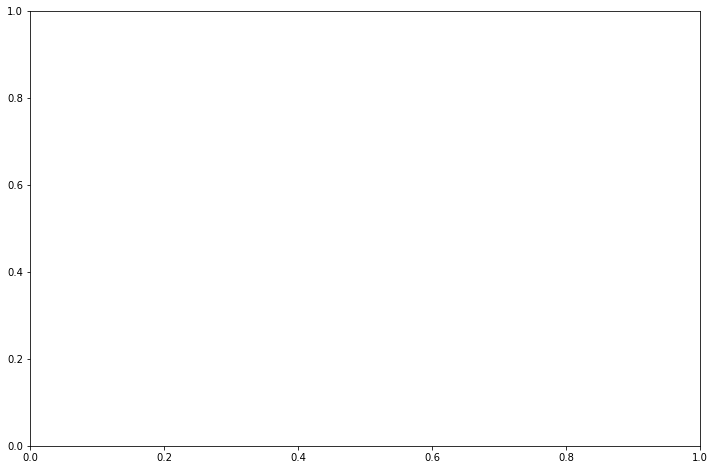

In [31]:
fig = plt.figure(figsize=(12, 8))
plt.plot(dataX, dataY, "ro", color="r",label="value1 of data01" )
#x = np.linspace()
#plt.xticks([0, 400, 800]) #目盛りの追加（データの番号）
plt.xticks(fontsize = 20) #軸目盛変更
plt.yticks(fontsize = 20) #軸目盛変更
#plt.xticks(np.arange(0, 1001, 125), np.arange(0, 80, 10)) #最後が表示されない？
#plt.yscale('log') #対数表示
plt.grid(color = "gray", linestyle="--") #()の中なしでも可
plt.minorticks_on() #補助目盛り
plt.xlim(10, 40)
plt.ylim(0, 0.0005) #軸の範囲
plt.xlabel("Wavelength in Display (nm)",size = "xx-large", fontsize = 20)
plt.ylabel("Peak Voltage (V)",size = "xx-large", fontsize = 20)
#plt.legend(loc="upper right") #ラベル位置指定
plt.show()
#plt.savefig("10ns.Harufa-py.jpg") #カレントフォルダに保存

In [87]:
        pyautogui.click(420, 220)
        pyautogui.click(420, 150)
        pyautogui.click(800, 550)
        time.sleep(0.2)
        pyautogui.click(1100, 540)
        RawData = pd.read_csv(filepath_or_buffer="./Data/DataCapture.csv")
        Data = np.array(RawData)
        

In [64]:
RawData = pd.read_csv(filepath_or_buffer="./Data/DataCapture.csv")
Data = np.array(RawData)
Data = Data
print(Data)

[['Max' '+100uV' nan]]


In [113]:
pyautogui.click(140, 70)
time.sleep(3)
pyautogui.click(30, 70)
time.sleep(1)
pyautogui.click(800, 550)
time.sleep(0.2)
pyautogui.click(1100, 540)
RawData = pd.read_csv(filepath_or_buffer="./Data/Waveform.txt")
Data = np.array(RawData)
Data = max(Data)
print(Data)

[0.00025]


In [112]:
RawData = pd.read_csv(filepath_or_buffer="./Data/Waveform.txt")
Data = np.array(RawData)
Data = max(Data)
print(Data)

[0.00025]


In [110]:
# 2軸へ角速度指令
import numpy as np
import pyautogui
import sys, time
import pandas as pd
from dx2lib import *  # dx2libをインポート

COMPort = b'\\\\.\\COM4'  # 任意のCOMポート名に修正の事
Baudrate = 57600          # Dynamixelのボーレートと合わせる事
TargetID1 = 1             # 1台目のDynamixelのIDと合わせる事
#TargetID2 = 2             # 2台目のDynamixelのIDと合わせる事

#---------------------------------------------
# (1) ポートを開いてdevを取得(必須)
dev = DX2_OpenPort(COMPort, Baudrate)
if dev != None:
  # (2) IDの一覧
  IDs = (c_uint8 * 2)(TargetID1)
  #IDs = (c_uint8 * 2)(TargetID1, TargetID2)
  # (3) 指定IDのモデル情報を取得しモデル名を表示
  #   いちいちモデル名を表示する必要は無いが、情報取得のついでに表示
  #   また、ここでは情報の取得ができたかの確認をしていない
  for id in IDs:
    print(id, DXL_GetModelInfo(dev,id).contents.name.decode())

  # (4) DynamixelをVelocityモード=1に変更
  DXL_SetOperatingModesEquival(dev, IDs, 2, 4)
  # (5) トルクイネーブル(必須)
  DXL_SetTorqueEnablesEquival(dev, IDs, 2, True)

  # (6) 2軸分の角速度[deg/sec]と時間待ちを順次指令
  StartAngle = 10
  EndAngle = 40
  Resolution = 2.4
  DXL_SetGoalAngle(dev, TargetID1, StartAngle)
  i = 0
  RepeatNum = 2
  dataX = []
  dataY = []
  for i in np.arange(StartAngle, EndAngle, Resolution):
#   for i in a:
    dataX.append(i) #x軸の値=角度
    DXL_SetGoalAngle(dev, TargetID1, i)
    #DXL_SetGoalAngle(dev, TargetID2,  i)
    time.sleep(0.5)

    
  print(dataX)
  print(dataY)
  
#   DXL_SetGoalAngle(dev, TargetID1,  i)
#   DXL_SetGoalAngle(dev, TargetID2,  i)
#   time.sleep(5)

  
  # (7) トルクイネーブルディスエーブル(必要に応じて)
  DXL_SetTorqueEnablesEquival(dev, IDs, 2, False)

  # (8) ポートを閉じる(必須)
  DX2_ClosePort(dev)
else:
  print('Could not open COM port.')


1 XL430-W250
0 NONE
[10.0, 12.4, 14.8, 17.200000000000003, 19.6, 22.0, 24.400000000000002, 26.800000000000004, 29.200000000000003, 31.6, 34.0, 36.400000000000006, 38.800000000000004]
[]
